## Informe Hito 1

**Tema:** 

Modelo de predicción de la severidad de accidentes de tráfico basado en el entorno y factores climáticos


**Grupo 22**

**Integrantes:**
*   Camila Fuentes
*   Benjamín San Martin
*   Diego Faúndez
*   Felipe Mellado
*   Javier Kauer

**Fecha de Entrega:**
25 de abril 2023



## Introducción



En la era moderna, el automóvil se ha posicionado como uno de los medios de transporte más populares a nivel mundial. Junto con esto, los accidentes relacionados a esta forma de movilización se mantienen como una preocupación constante para usuarios, fabricantes y demás entidades relacionadas. Esto último genera una constante necesidad de estudiar las razones por las que estos accidentes se provocan, llevando a empresas y entidades de gobierno a gastar millones cada año en analizar las causas para posteriormente solucionar. 
En este proyecto, se buscará estudiar como los factores ambientales y del entorno afectan a los accidentes vehiculares mediante el analisis de como estos factores repercuten en la severidad del accidente.
Analizando una base de datos que contiene accidentes vehiculares ocurridos en Estados Unidos entre los años 2016 y 2021, se buscará generar un modelo que permita predecir la severidad de un accidente, en base a los diferentes factores del entorno al momento de ocurrido. Estos factores van desde meramente ambientales, como la velocidad del viento o la presencia de lluvia, a relacionados con la ruta y el entorno, como la presencia de señales de tráfico o la cercanía a una vía de tren.
Esto permitirá obtener una amplia gama de factores que puedan influir de mayor o menor manera en un accidente y se pueda predecir con mayor precisión la gravedad de un posible accidente en base a esos factores.

## Limpieza de Datos:

La limpieza de datos se hizo en 2 fases. El primero corresponde a la etapa de limpieza del database, y el segundo corresponde a la selección de datos. 

En la primera etapa del proyecto, se llevó a cabo la limpieza de los datos para asegurar su utilidad. Se utilizó Python y Jupyter Notebook para realizar este proceso y se aplicó un criterio para determinar qué columnas eran relevantes, basado en: la ambigüedad de los datos, su falta de relevancia para el estudio y la prevalencia de un tipo de dato en particular. Como resultado, se seleccionaron las siguientes 24 columnas para eliminar del dataset: "End-Time", "Start_Lat", "End_Lat", "End_Lng", "Distance(mi)", "Description", "Number", "Side", "County", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Direction", "Amenity", "No_Exit", "Roundabout", "Station", "Traffic-Calming", "Turning_Loop", "Civil_Twilight", "Nautical_Twilight" y "Astronomical_Twilight".

A continuación, debido a la gran cantidad de datos en el dataset, se eliminaron las filas que contenían valores nulos. Después se convertieron los valores del sistema imperial al sistema internacional de unidades (SI), creando cuatro funciones que transforman millas por hora a kilómetros por hora, grados Fahrenheit a grados Celsius, millas a kilómetros, y pulgadas de agua a pascales. Se aplicaron estas funciones a las columnas "Temperature(F)", "Wind_Chill(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)" y "Precipitation(in)" utilizando el método "apply" de Pandas. Luego, se renombraron estas columnas para reflejar las unidades de medida actualizadas.

Después, utilizando el método "split" de strings, se crearon tres nuevas columnas a partir de la columna "Start_Time" obteniendo en columnas apartes la fecha y la hora. Siguiente la columna "date" se convirtió al tipo datetime utilizando el método "to_datetime". Después, se creó una nueva columna "year" extrayendo el año de la columna "date". Posteriormente, la columna "Start_Time" se eliminó. Finalmente se guardó el archivo en un archivo .csv.

In [ ]:
import pandas as pd

PATH = r"C:\Users\kauer\OneDrive - Universidad de Chile\U\7mo Semestre\CC5205\
proyecto\US_Accidents_Dec21_updated.csv"

df = pd.read_csv(PATH, memory_map= True)

df = df.drop(["End_Time", "Start_Lat","End_Lat", "End_Lng", "Distance(mi)", 
              "Description", "Number", "Side", "County", "Zipcode", "Country",
              "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Direction",
              "Amenity", "No_Exit","Roundabout","Station", "Traffic_Calming", 
              "Turning_Loop", "Civil_Twilight", "Nautical_Twilight", 
              "Astronomical_Twilight"], axis=1)

df = df.dropna(how="any", axis=0)

def mph_to_kmh(mph):
    kmh = mph*1.60934
    return kmh

def ftoc(f):
    c = (5/9)*(f-32)
    return c

def mitokm(mi):
    km = mi*1.60934
    return km

def intopa(inches):
    pa = inches*0.32201 
    return pa

df["Temperature(F)"] = df["Temperature(F)"].apply(ftoc)
df["Wind_Chill(F)"] = df["Wind_Chill(F)"].apply(ftoc)
df["Pressure(in)"] = df["Pressure(in)"].apply(intopa)
df["Visibility(mi)"] = df["Visibility(mi)"].apply(mitokm)
df["Wind_Speed(mph)"] = df["Wind_Speed(mph)"].apply(mph_to_kmh)
df["Precipitation(in)"] = df["Precipitation(in)"].apply(intopa)

df = df.rename(columns={"Temperature(F)": "Temperature(C)", "Wind_Chill(F)" :
                        "Wind_Chill(C)", "Pressure(in)" : "Pressure(pa)", 
                        "Visibility(mi)" : "Visibility(km)", "Wind_Speed(mph)" 
                        : "Wind_Speed(kmh)", "Precipitation(in)" : "Precipitation(pa)"})

df[['date', 'time']] = df['Start_Time'].str.split(' ', expand=True)
df["date"]= pd.to_datetime(df["date"])
df['year'] = df['date'].dt.year
df = df.drop("Start_Time", axis=1)

PATH1 = r"C:\Users\kauer\OneDrive - Universidad de Chile\U\7mo Semestre\CC5205\
proyecto\datos_limpios.csv"

df.to_csv(PATH1, index=False)


Con respecto a la segunda fase de los datos, en un principio, se tenía pensado seleccionar una cantidad aleatoria de datos por año entre el 2019 y el 2019, específicamente 20.0000, para trabajar en el posterior análisis exploratorio. Pero debido a la sobrerepresentación de datos con severidad 2, es imposible hacer un análisis exploratorio y mucho menos un modelo predictivo, pues todos los datos estarían inclinados a ser de severidad 2. Por lo anterior se decidió cambiar la metodología en el trabajo de los datos.
A continuación se presenta la sobrerepresentación de datos anteriormente descrita.

In [ ]:
hist(datos$Severity)

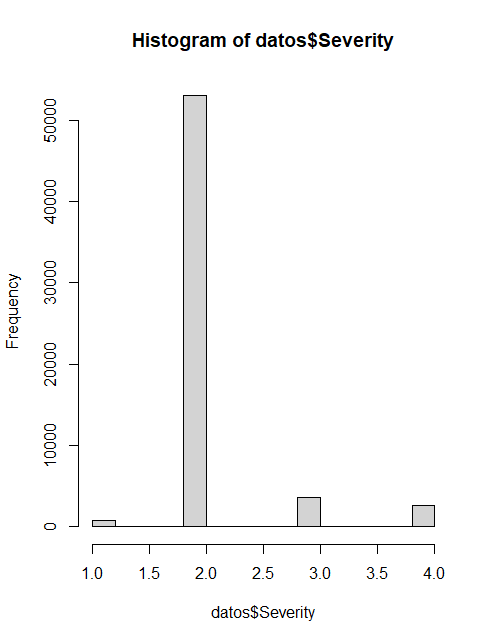

## Análisis Exploratorio

En primer lugar, se llevó a cabo una reorganización de los grupos clasificacados por severidad, en las que se separaron los niveles 1 y 2 de los niveles 3 y 4, los que posteriormente se renombraron como "Minor accident" y "Serious accident" respectivamente. Luego, de estos dos grupos, se escogieron 50.000 datos de cada uno para poder comenzar el análisis exploratorio, lo anterior genera un sesgo en el modelo debido a que se ajustó la distribución de clases del conjunto de datos. Esta decisión se tomó debido a la necesidad de poder predecir severidades mayores, por lo que el sesgo fué necesario para que el modelo fuera mas uniforme y evitara la clara predominancia de la severidad 2. La creación de estos archivos se pueda observar en los códigos siguientes.

In [ ]:
import csv

with open("datos_limpios.csv") as csvfile:

    reader = csv.reader(csvfile)

    csv1y2 = open("sev1y2.csv", "a", newline="")
    writer1y2 = csv.writer(csv1y2)

    csv3y4 = open("sev3y4.csv", "a", newline="")
    writer3y4 = csv.writer(csv3y4)

    for row in reader:
        if row[1] == '1' or row[1] == '2':
            new_row = [row[0]] + ["Minor accident"] + row[2:]
            writer1y2.writerow(new_row)
        
        if row[1] == '3' or row[1] == '4':
            new_row = [row[0]] + ["Serious accident"] + row[2:]
            writer3y4.writerow(new_row)

In [ ]:
import csv
import random as rn

with open("sev1y2.csv") as csv1y2:
    reader = csv.reader(csv1y2)

    muestra = list(reader)

    random_pick = rn.sample(muestra, 50000)

    csvfinal = open("DatosFinales.csv", "a", newline="")
    writerfinal = csv.writer(csvfinal)
    
    for row in random_pick:
        writerfinal.writerow(row)

In [ ]:
import csv
import random as rn

with open("sev3y4.csv") as csv3y4:
    reader = csv.reader(csv3y4)

    muestra = list(reader)

    random_pick = rn.sample(muestra, 50000)

    csvfinal = open("DatosFinales.csv", "a", newline="")
    writerfinal = csv.writer(csvfinal)
    
    for row in random_pick:
        writerfinal.writerow(row)

Una vez obtenido un dataset en donde esté mejor distribuidos los datos, se puede comenzar a hacer un análisis exploratorio. Para comenzar, debido a la gran cantidad de variables, se hizo la matriz de correlación para poder observar las posibles relaciones entre ellas. Después se hicieron gráficos con el objetivo de mostrar el comportamiento de las distintas variables en función de la severidad del accidente. 

Se observa  la matriz de correlación entre las varibles.

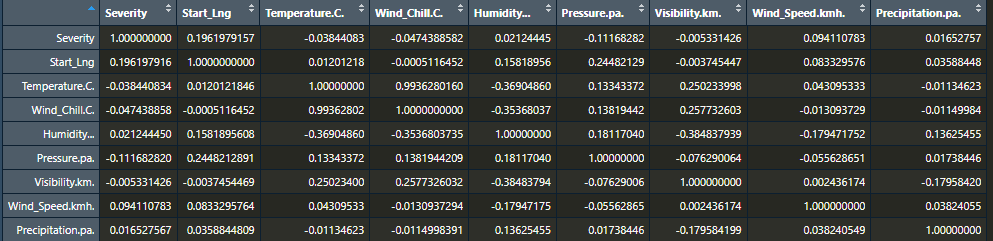



Para comenzar, se muestra la cantidad de accidentes que se tienen en función del clima, entre los dos valores de severidad. A primera vista se observa que el comportamiento de la severidad es bastante similar en los distintos climas posibles. El código para generar el gráfico se muestra a continuación:

In [ ]:
ggplot(data, aes(x=Severity, fill=Weather_Condition)) + 
  geom_bar(position="dodge")
labs(x="Severity", y="Cantidad")

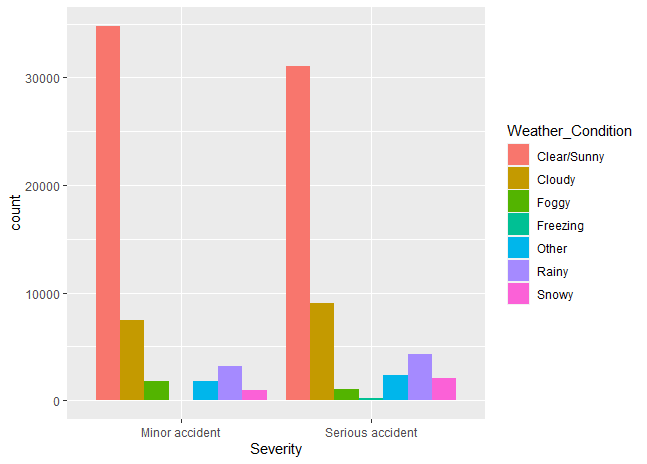

El siguiente gráfico mostrado corresponde a un boxplot de la distribución de la severidad de accidentes en función de la temperatura. La mayoría de gráficos de este tipo, con las varibles relacionadas al clima, tenían un comportamiento similar, sin ninguna relación demasiado evidente. El código para generar este gráfico es el mostrado a continuación.



In [ ]:
ggplot(data, aes(x = factor(Severity), y = Temperature.C., fill = factor(Severity))) +
  geom_boxplot(alpha = 1, notch = FALSE) +
  scale_fill_discrete(name = "Severidad") +
  labs(title = "Relación entre severidad y temperatura",
       x = "Severidad",
       y = "Temperatura")

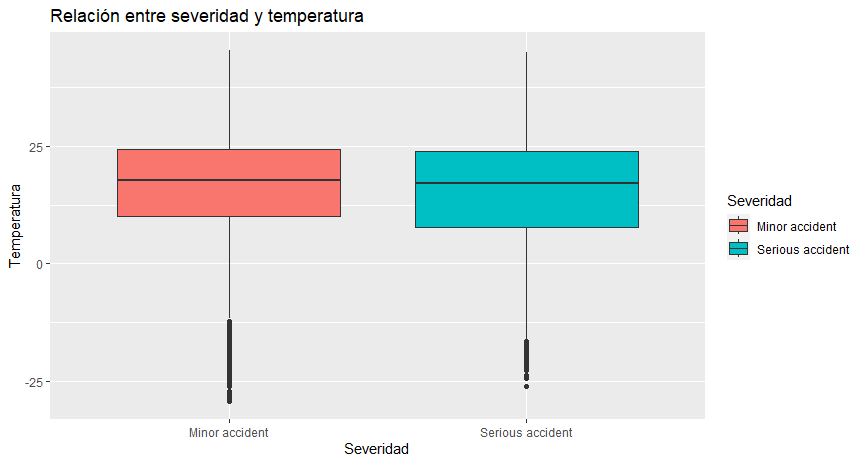

El siguiente gráfico corresponde a la cantidad de severidad del accidente en función de si es día o noche. Se puede observar que la proproción de la severidad de los accidente se mantiene relativamente similar entre el día y la noche.

In [ ]:
ggplot(data, aes(x=Severity, fill=Sunrise_Sunset)) + 
  geom_bar(position="dodge")
labs(x="Severity", y="Cantidad")

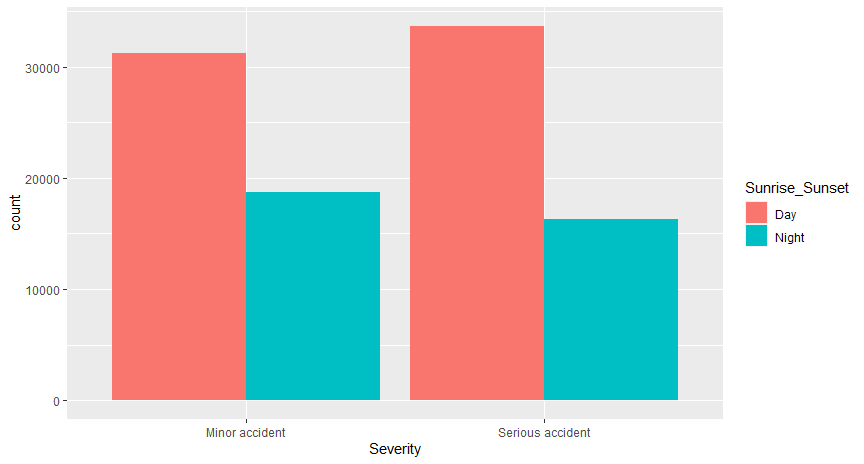

## Preguntas y Problemas

Las preguntas surgidas basandose en el análisis exploratorio son las siguientes:

1.   ¿Es posible predecir la severidad de un accidente en función de los factores del entorno?
2.   ¿Se puede saber cuál es la condición climática que genera más accidentes severos basandose en proporciones (por ejemplo x accidentes cada 100 mil autos) y no en datos absolutos como en el dataset?
3. ¿Es posible generar un modelo correcto basandose en un dataset desbalanceado?
4. ¿Qué tanto varía el modelo y sus resultados al eliminar el undersampling?



## Contribución

Camila Fuentes:


*   Hizo la matriz de correlación
*   Ayudó con la presentación
*   Ayudó con los gráficos de tipo boxplot

Benjamín San Martin

*  Particionó el dataset y seleccionó los datos
*  Se ayudó con la creación de gráficos
*  Ayudó en la presentación

Diego Faúndez

*  Ayudó con la limpieza de datos
*  Se encargó de los gráficos
*  Escribió la introducción del informe, y demás

Felipe Mellado

*  Limpieza de datos
*  Ayudó en la presentación
*  Selección de gráficos para el informe
*  Parte del Informe

Javier Kauer

*  Limpieza de datos
*  Cuerpo del informe 


